In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('data.csv')
test = pd.read_csv('test.csv')

In [2]:
# message column contains a sentence of unknown words
# find number of unique words in both train and test set
train['message'] = train['message'].str.lower()
test['message'] = test['message'].str.lower()

unique_words_train = set()
unique_words_test = set()

for message in train['message']:
    unique_words_train.update(message.split())
for message in test['message']:
    unique_words_test.update(message.split())

print('Number of unique words in train set:', len(unique_words_train))
print('Number of unique words in test set:', len(unique_words_test))

Number of unique words in train set: 636
Number of unique words in test set: 434


In [5]:
# are there any words in test set that are not in train set?
print('Words in test set that are not in train set:', unique_words_test - unique_words_train)
print(len(unique_words_test - unique_words_train))

Words in test set that are not in train set: {'rclikum', 'cybres', 'hopiui', 'astrou', 'nexcs', 'sibenix', 'tristix', 'algocix', 'sadkx', 'codix', 'loeix', 'cfntarex', 'ffnix', 'zitanos', 'xwno', 'insoctus', 'leafoz', 'zcphyr', 'gootix', 'raghx', 'diitax', 'letax', 'vodex', 'empatpix', 'griphox', 'puksar', 'cyflopix', 'sylarix', 'eoliar', 'mermad', 'ekoq', 'techcx', 'cybrey', 'zoblax', 'cybnon', 'pbuvia', 'titagos', 'uflx', 'elrex', 'bgastix', 'sterdux', 'nexis', 'keakos', 'joyzcr', 'techit', 'genix', 'aeiana', 'unieor', 'natobyt', 'soluw', 'quatar', 'nanouom', 'srnapz', 'mechix', 'nebuxax', 'quantzz', 'metegrn', 'gulsar', 'nimbuf', 'lentus', 'ragyx', 'xryptoz', 'gleyx', 'shtmex', 'ccyptoz', 'farnar', 'pluvoa', 'dlissam', 'bvastix', 'launar', 'herea', 'sirmnix', 'shockks', 'ligitron', 'deibax', 'exos', 'ekoa', 'metmax', 'caloox', 'orbiwaz', 'zenkx', 'zofp', 'zechyr', 'shodkus', 'solbx', 'tilanos', 'weuraz', 'mwrmax', 'aeno', 'luviue', 'qcasar', 'jynapz', 'nevraz', 'ragix', 'alezom', 'e

In [15]:
# take only the first three letters of each word in each sentence in train set
# for each of this substring, pair it with which species has these kind of words

train['message_split'] = train['message'].str.split()
train['message_split'] = train['message_split'].apply(lambda x: [word[:3] for word in x])

three_letter_words = {}
# store word and number of occurences
for message in train['message_split']:
    for word in message:
        if word in three_letter_words:
            three_letter_words[word] += 1
        else:
            three_letter_words[word] = 1

three_dict = {}
for word in three_letter_words:
    three_dict[word] = train[train['message_split'].apply(lambda x: word in x)]['species'].unique()

# sort by minimum number of species
three_dict = {k: v for k, v in sorted(three_dict.items(), key=lambda item: len(item[1]))}

three_dict_with_count = {}
for word in three_dict:
    temp = {}
    temp['species'] = three_dict[word]
    temp['count'] = three_letter_words[word]
    three_dict_with_count[word] = temp

# get those with count > 5
{k: v for k, v in three_dict_with_count.items() if v['count'] > 5}

{'plu': {'species': array(['Aquari', 'Florian'], dtype=object), 'count': 26},
 'arb': {'species': array(['Aquari', 'Florian'], dtype=object), 'count': 18},
 'aqu': {'species': array(['Aquari', 'Florian'], dtype=object), 'count': 16},
 'xen': {'species': array(['Zorblax', 'Quixnar'], dtype=object), 'count': 21},
 'neb': {'species': array(['Zorblax', 'Quixnar'], dtype=object), 'count': 55},
 'gli': {'species': array(['Zorblax', 'Quixnar'], dtype=object), 'count': 21},
 'nov': {'species': array(['Zorblax', 'Quixnar'], dtype=object), 'count': 61},
 'gal': {'species': array(['Zorblax', 'Quixnar'], dtype=object), 'count': 21},
 'ins': {'species': array(['Florian', 'Aquari'], dtype=object), 'count': 16},
 'eko': {'species': array(['Florian', 'Aquari'], dtype=object), 'count': 16},
 'nim': {'species': array(['Florian', 'Aquari'], dtype=object), 'count': 17},
 'mer': {'species': array(['Faerix', 'Mythron'], dtype=object), 'count': 18},
 'dra': {'species': array(['Faerix', 'Mythron'], dtype=obje

In [26]:
test['message_split'] = test['message'].str.split()
test['message_split'] = test['message_split'].apply(lambda x: [word[:3] for word in x])

test_words = {}
for message in test['message_split']:
        for word in message:
            if word in test_words:
                test_words[word] += 1
            else:
                test_words[word] = 1

out_of_dict = {}
for word in three_dict_with_count:
    if word not in test_words and len(three_dict_with_count[word]['species']) >= 2:
        out_of_dict[word] = three_dict_with_count[word]['count']

out_of_dict = {k: v for k, v in sorted(out_of_dict.items(), key=lambda item: -item[1])}

print(out_of_dict)

{'hau': 2, 'cor': 2, 'nxb': 2, 'kkm': 2, 'sey': 2, 'ari': 2, 'vri': 2, 'feb': 2}


In [30]:
not_in_train = {}
for word in test_words:
    if word not in three_dict_with_count:
        not_in_train[word] = test_words[word]

not_in_train = {k: v for k, v in sorted(not_in_train.items(), key=lambda item: -item[1])}

print(not_in_train)

{'eol': 2, 'net': 2, 'iep': 1, 'ule': 1, 'dii': 1, 'sib': 1, 'cyf': 1, 'tri': 1, 'awm': 1, 'rcl': 1, 'cjb': 1, 'nat': 1, 'dol': 1, 'orr': 1, 'kng': 1, 'qre': 1, 'gei': 1, 'vyb': 1, 'bga': 1, 'awx': 1, 'let': 1, 'zof': 1, 'aro': 1, 'aen': 1, 'sht': 1, 'evp': 1, 'vup': 1, 'hoo': 1, 'nev': 1, 'mwr': 1, 'gre': 1, 'frn': 1, 'drw': 1, 'cur': 1, 'epv': 1, 'waz': 1, 'zez': 1, 'nea': 1, 'xwn': 1, 'elr': 1, 'rae': 1, 'lau': 1, 'tjt': 1, 'vod': 1, 'gen': 1, 'gup': 1, 'ong': 1, 'sda': 1, 'ced': 1, 'ale': 1, 'zob': 1, 'exo': 1, 'cyx': 1, 'cyu': 1, 'cez': 1, 'ngm': 1, 'jer': 1, 'aei': 1, 'wqu': 1, 'cau': 1, 'xry': 1, 'til': 1, 'far': 1, 'ubo': 1, 'jof': 1, 'qha': 1, 'weu': 1, 'srl': 1, 'goo': 1, 'srn': 1, 'zcp': 1, 'lev': 1, 'bho': 1, 'dyg': 1, 'jyn': 1, 'toc': 1, 'eos': 1, 'snx': 1, 'glv': 1, 'zef': 1, 'fui': 1, 'ate': 1, 'fam': 1, 'reg': 1, 'lva': 1, 'gko': 1, 'nyv': 1, 'reb': 1, 'tic': 1, 'loe': 1, 'mee': 1, 'kea': 1, 'meh': 1, 'fak': 1, 'upo': 1, 'bca': 1, 'tor': 1, 'zit': 1, 'sog': 1, 'cfn': 1,

In [33]:
results = pd.read_csv("result.csv")

results.head()

,species
0,Aquari
1,Sentire
2,Florian
3,Mythron
4,Mythron


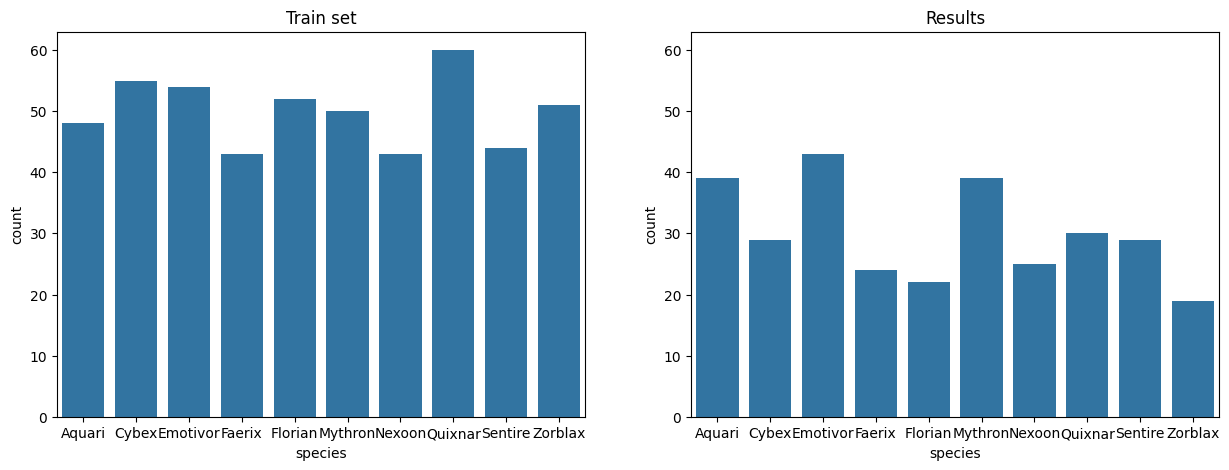

In [36]:
# plot species counts in train and results
species_counts = train['species'].value_counts()
species_counts = species_counts.reset_index()
species_counts.columns = ['species', 'count']
species_counts = species_counts.sort_values(by='species')

results_counts = results['species'].value_counts()
results_counts = results_counts.reset_index()
results_counts.columns = ['species', 'count']
results_counts = results_counts.sort_values(by='species')

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='species', y='count', data=species_counts, ax=ax[0])
ax[0].set_title('Train set')
sns.barplot(x='species', y='count', data=results_counts, ax=ax[1])
ax[1].set_title('Results')
ax[1].set_ylim(ax[0].get_ylim())
plt.show()

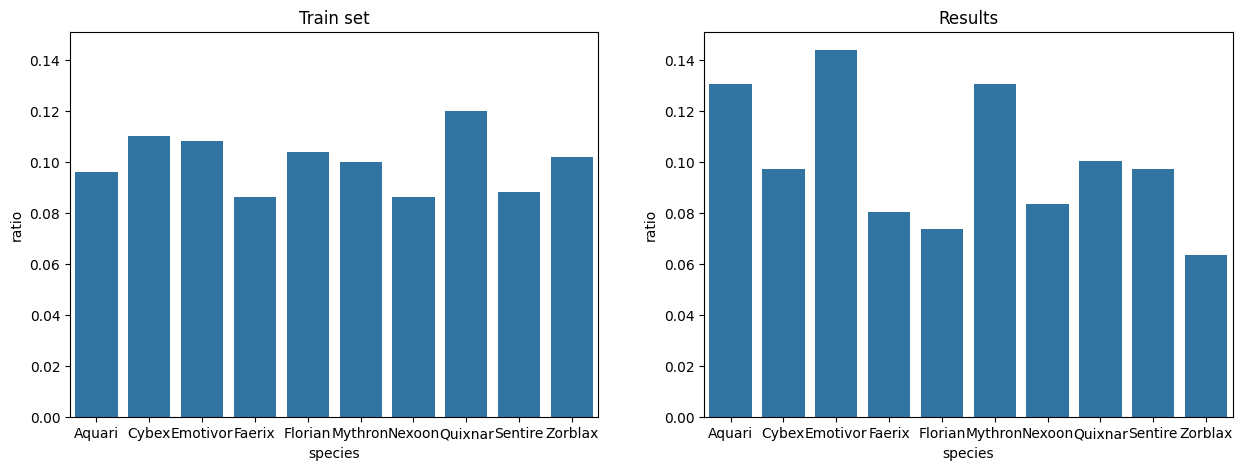

In [38]:
# create barplots with ratio of species in train and results
species_counts['ratio'] = species_counts['count'] / species_counts['count'].sum()
results_counts['ratio'] = results_counts['count'] / results_counts['count'].sum()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.barplot(x='species', y='ratio', data=species_counts, ax=ax[0])
ax[0].set_title('Train set')
sns.barplot(x='species', y='ratio', data=results_counts, ax=ax[1])
ax[1].set_title('Results')
ax[0].set_ylim(ax[1].get_ylim())
plt.show()

In [40]:
# calculate sum of absolute difference between ratios of species in train and results
summed_value = np.abs(species_counts['ratio'] - results_counts['ratio']).sum()

summed_value

0.13336454849498322